In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[16,32,64,128,256] # sliding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=16
Axis='AccX' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Sparse/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import regularizers

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

In [7]:
encoding_dim

16

AccX is registed now
Build Complete
(254742,)
windowData's num =15914
SourceData's aborting data = 6
window shape is (15914, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=16-l1_reg=10e-5
Train on 15914 samples, validate on 15914 samples
Epoch 1/100
2s - loss: -1.2989e+03 - val_loss: -1.3708e+03
Epoch 2/100
1s - loss: -1.3890e+03 - val_loss: -1.4305e+03
Epoch 3/100
2s - loss: -1.4355e+03 - val_loss: -1.4425e+03
Epoch 4/100
3s - loss: -1.4652e+03 - val_loss: -1.4901e+03
Epoch 5/100
3s - loss: -1.4940e+03 - val_loss: -1.4943e+03
Epoch 6/100
3s - loss: -1.5056e+03 - val_loss: -1.5128e+03
Epoch 7/100
3s - loss: -1.5202e+03 - val_loss: -1.5341e+03
Epoch 8/100
3s - loss: -1.5292e+03 - val_loss: -1.5261e+03
Epoch 9/100
3s - loss: -1.5301e+03 - val_loss: -1.5309e+03
Epoch 10/100
3s - loss: -1.5359e+03 - val_loss: -1.5403e+03
Epoch 11/100
3s - loss: -1.5408e+03 - val_loss: -1.5410e+03
Epoch 12/100
3s - loss: -1.5410e+03 - val_loss: -1.5408e+03
Epoch 13/100
4s - loss: -1.5414e+03 - val_loss

/home/takeyama/.pyenv/versions/2.7.11/envs/takeyama/lib/python2.7/site-packages/keras/backend/theano_backend.py:558: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 1 is not part of the computational graph needed to compute the outputs: keras_learning_phase.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  **kwargs)


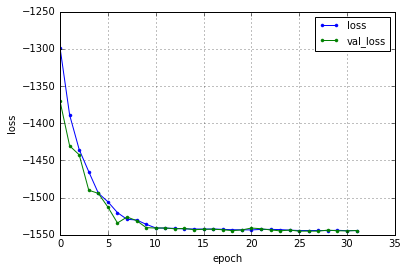

AccX is registed now
Build Complete
(254742,)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=32-l1_reg=10e-5
Train on 7957 samples, validate on 7957 samples
Epoch 1/100
2s - loss: -1.2430e+03 - val_loss: -1.2947e+03
Epoch 2/100
2s - loss: -1.3403e+03 - val_loss: -1.3794e+03
Epoch 3/100
1s - loss: -1.4040e+03 - val_loss: -1.4203e+03
Epoch 4/100
1s - loss: -1.4379e+03 - val_loss: -1.4599e+03
Epoch 5/100
2s - loss: -1.4636e+03 - val_loss: -1.4714e+03
Epoch 6/100
1s - loss: -1.4834e+03 - val_loss: -1.5001e+03
Epoch 7/100
1s - loss: -1.5007e+03 - val_loss: -1.5019e+03
Epoch 8/100
2s - loss: -1.5108e+03 - val_loss: -1.5119e+03
Epoch 9/100
2s - loss: -1.5183e+03 - val_loss: -1.5246e+03
Epoch 10/100
2s - loss: -1.5413e+03 - val_loss: -1.5547e+03
Epoch 11/100
1s - loss: -1.5554e+03 - val_loss: -1.5560e+03
Epoch 12/100
1s - loss: -1.5559e+03 - val_loss: -1.5562e+03
Epoch 13/100
1s - loss: -1.5560e+03 - val_loss: -

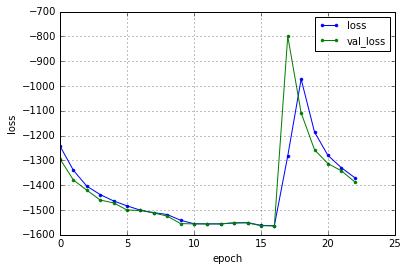

AccX is registed now
Build Complete
(254742,)
windowData's num =3979
SourceData's aborting data = 22
window shape is (3979, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=64-l1_reg=10e-5
Train on 3979 samples, validate on 3979 samples
Epoch 1/100
0s - loss: -1.1546e+03 - val_loss: -1.2545e+03
Epoch 2/100
0s - loss: -1.2939e+03 - val_loss: -1.3548e+03
Epoch 3/100
0s - loss: -1.3621e+03 - val_loss: -1.3676e+03
Epoch 4/100
0s - loss: -1.3765e+03 - val_loss: -1.3801e+03
Epoch 5/100
0s - loss: -1.3875e+03 - val_loss: -1.3896e+03
Epoch 6/100
0s - loss: -1.3924e+03 - val_loss: -1.3921e+03
Epoch 7/100
0s - loss: -1.3972e+03 - val_loss: -1.4011e+03
Epoch 8/100
0s - loss: -1.4113e+03 - val_loss: -1.4205e+03
Epoch 9/100
0s - loss: -1.4311e+03 - val_loss: -1.4388e+03
Epoch 10/100
0s - loss: -1.4399e+03 - val_loss: -1.4411e+03
Epoch 11/100
0s - loss: -1.4483e+03 - val_loss: -1.4509e+03
Epoch 12/100
0s - loss: -1.4515e+03 - val_loss: -1.4547e+03
Epoch 13/100
0s - loss: -1.4625e+03 - val_loss: -

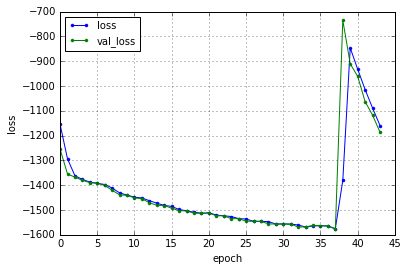

AccX is registed now
Build Complete
(254742,)
windowData's num =1990
SourceData's aborting data = 22
window shape is (1990, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=128-l1_reg=10e-5
Train on 1990 samples, validate on 1990 samples
Epoch 1/100
0s - loss: -1.0719e+03 - val_loss: -1.1450e+03
Epoch 2/100
0s - loss: -1.1956e+03 - val_loss: -1.2299e+03
Epoch 3/100
0s - loss: -1.2782e+03 - val_loss: -1.3269e+03
Epoch 4/100
0s - loss: -1.3338e+03 - val_loss: -1.3378e+03
Epoch 5/100
0s - loss: -1.3414e+03 - val_loss: -1.3468e+03
Epoch 6/100
0s - loss: -1.3467e+03 - val_loss: -1.3428e+03
Epoch 7/100
0s - loss: -1.3478e+03 - val_loss: -1.3499e+03
Epoch 8/100
0s - loss: -1.3564e+03 - val_loss: -1.3687e+03
Epoch 9/100
0s - loss: -1.3735e+03 - val_loss: -1.3802e+03
Epoch 10/100
0s - loss: -1.3885e+03 - val_loss: -1.3981e+03
Epoch 11/100
0s - loss: -1.4005e+03 - val_loss: -1.4076e+03
Epoch 12/100
0s - loss: -1.4088e+03 - val_loss: -1.4097e+03
Epoch 13/100
0s - loss: -1.4172e+03 - val_loss: 

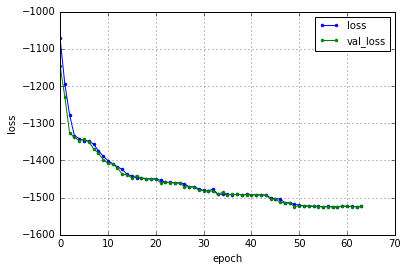

AccX is registed now
Build Complete
(254742,)
windowData's num =995
SourceData's aborting data = 150
window shape is (995, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=256-l1_reg=10e-5
Train on 995 samples, validate on 995 samples
Epoch 1/100
0s - loss: -1.0654e+03 - val_loss: -1.1152e+03
Epoch 2/100
0s - loss: -1.1557e+03 - val_loss: -1.1783e+03
Epoch 3/100
0s - loss: -1.2011e+03 - val_loss: -1.2261e+03
Epoch 4/100
0s - loss: -1.2461e+03 - val_loss: -1.2620e+03
Epoch 5/100
0s - loss: -1.2881e+03 - val_loss: -1.3130e+03
Epoch 6/100
0s - loss: -1.3248e+03 - val_loss: -1.3278e+03
Epoch 7/100
0s - loss: -1.3329e+03 - val_loss: -1.3398e+03
Epoch 8/100
0s - loss: -1.3475e+03 - val_loss: -1.3484e+03
Epoch 9/100
0s - loss: -1.3490e+03 - val_loss: -1.3493e+03
Epoch 10/100
0s - loss: -1.3495e+03 - val_loss: -1.3496e+03
Epoch 11/100
0s - loss: -1.3501e+03 - val_loss: -1.3507e+03
Epoch 12/100
0s - loss: -1.3577e+03 - val_loss: -1.3596e+03
Epoch 13/100
0s - loss: -1.3602e+03 - val_loss: -1.

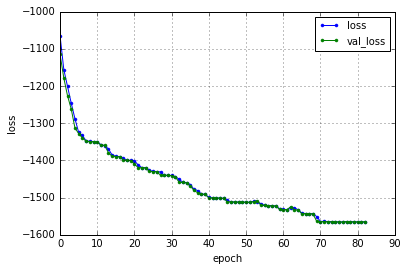

AccX is registed now
Build Complete
(254742,)
windowData's num =15906
SourceData's aborting data = 6
window shape is (15906, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=16-l1_reg=10e-5
Train on 15906 samples, validate on 15906 samples
Epoch 1/100
1s - loss: -2.5055e+03 - val_loss: -2.7228e+03
Epoch 2/100
1s - loss: -2.7762e+03 - val_loss: -2.8179e+03
Epoch 3/100
1s - loss: -2.8412e+03 - val_loss: -2.8518e+03
Epoch 4/100
1s - loss: -2.8862e+03 - val_loss: -2.9071e+03
Epoch 5/100
1s - loss: -2.9088e+03 - val_loss: -2.9193e+03
Epoch 6/100
1s - loss: -2.9380e+03 - val_loss: -2.9675e+03
Epoch 7/100
1s - loss: -2.9713e+03 - val_loss: -2.9776e+03
Epoch 8/100
1s - loss: -3.0079e+03 - val_loss: -3.0187e+03
Epoch 9/100
1s - loss: -3.0191e+03 - val_loss: -3.0203e+03
Epoch 10/100
1s - loss: -3.0295e+03 - val_loss: -3.0389e+03
Epoch 11/100
1s - loss: -3.0433e+03 - val_loss: -3.0496e+03
Epoch 12/100
1s - loss: -3.0551e+03 - val_loss: -3.0581e+03
Epoch 13/100
1s - loss: -3.0710e+03 - val_loss

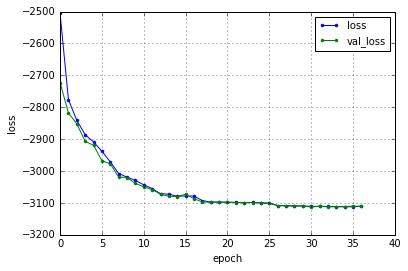

AccX is registed now
Build Complete
(254742,)
windowData's num =7953
SourceData's aborting data = 22
window shape is (7953, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=32-l1_reg=10e-5
Train on 7953 samples, validate on 7953 samples
Epoch 1/100
0s - loss: -2.4340e+03 - val_loss: -2.6164e+03
Epoch 2/100
0s - loss: -2.6645e+03 - val_loss: -2.7188e+03
Epoch 3/100
0s - loss: -2.7719e+03 - val_loss: -2.8074e+03
Epoch 4/100
0s - loss: -2.8456e+03 - val_loss: -2.8683e+03
Epoch 5/100
0s - loss: -2.8704e+03 - val_loss: -2.8730e+03
Epoch 6/100
0s - loss: -2.8785e+03 - val_loss: -2.9028e+03
Epoch 7/100
0s - loss: -2.9326e+03 - val_loss: -2.9569e+03
Epoch 8/100
0s - loss: -2.9571e+03 - val_loss: -2.9594e+03
Epoch 9/100
0s - loss: -2.9750e+03 - val_loss: -2.9817e+03
Epoch 10/100
0s - loss: -2.9959e+03 - val_loss: -3.0103e+03
Epoch 11/100
0s - loss: -3.0164e+03 - val_loss: -3.0362e+03
Epoch 12/100
0s - loss: -3.0386e+03 - val_loss: -3.0403e+03
Epoch 13/100
0s - loss: -3.0400e+03 - val_loss: -

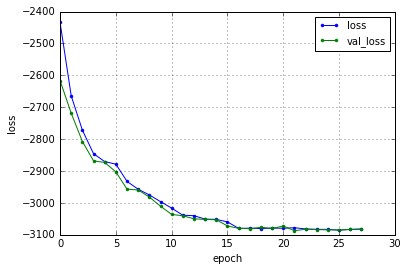

AccX is registed now
Build Complete
(254742,)
windowData's num =3977
SourceData's aborting data = 22
window shape is (3977, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=64-l1_reg=10e-5
Train on 3977 samples, validate on 3977 samples
Epoch 1/100
0s - loss: -2.2282e+03 - val_loss: -2.4071e+03
Epoch 2/100
0s - loss: -2.4962e+03 - val_loss: -2.5895e+03
Epoch 3/100
0s - loss: -2.6130e+03 - val_loss: -2.6227e+03
Epoch 4/100
0s - loss: -2.6574e+03 - val_loss: -2.6971e+03
Epoch 5/100
0s - loss: -2.7086e+03 - val_loss: -2.7253e+03
Epoch 6/100
0s - loss: -2.7448e+03 - val_loss: -2.7613e+03
Epoch 7/100
0s - loss: -2.7686e+03 - val_loss: -2.7796e+03
Epoch 8/100
0s - loss: -2.7974e+03 - val_loss: -2.8148e+03
Epoch 9/100
0s - loss: -2.8112e+03 - val_loss: -2.8114e+03
Epoch 10/100
0s - loss: -2.8253e+03 - val_loss: -2.8307e+03
Epoch 11/100
0s - loss: -2.8687e+03 - val_loss: -2.8818e+03
Epoch 12/100
0s - loss: -2.8916e+03 - val_loss: -2.9096e+03
Epoch 13/100
0s - loss: -2.9172e+03 - val_loss: -

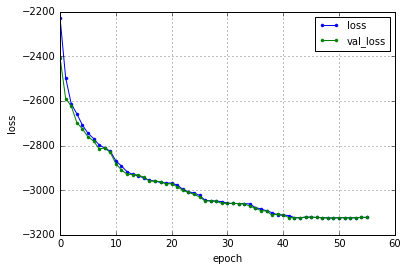

AccX is registed now
Build Complete
(254742,)
windowData's num =1989
SourceData's aborting data = 22
window shape is (1989, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=128-l1_reg=10e-5
Train on 1989 samples, validate on 1989 samples
Epoch 1/100
0s - loss: -2.0569e+03 - val_loss: -2.2324e+03
Epoch 2/100
0s - loss: -2.2846e+03 - val_loss: -2.3207e+03
Epoch 3/100
0s - loss: -2.3577e+03 - val_loss: -2.3873e+03
Epoch 4/100
0s - loss: -2.4111e+03 - val_loss: -2.4181e+03
Epoch 5/100
0s - loss: -2.4443e+03 - val_loss: -2.4753e+03
Epoch 6/100
0s - loss: -2.4845e+03 - val_loss: -2.5051e+03
Epoch 7/100
0s - loss: -2.5268e+03 - val_loss: -2.5556e+03
Epoch 8/100
0s - loss: -2.5751e+03 - val_loss: -2.5916e+03
Epoch 9/100
0s - loss: -2.6116e+03 - val_loss: -2.6241e+03
Epoch 10/100
0s - loss: -2.6298e+03 - val_loss: -2.6348e+03
Epoch 11/100
0s - loss: -2.6422e+03 - val_loss: -2.6524e+03
Epoch 12/100
0s - loss: -2.6577e+03 - val_loss: -2.6711e+03
Epoch 13/100
0s - loss: -2.6842e+03 - val_loss: 

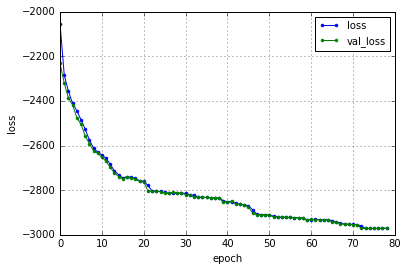

AccX is registed now
Build Complete
(254742,)
windowData's num =995
SourceData's aborting data = 22
window shape is (995, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=256-l1_reg=10e-5
Train on 995 samples, validate on 995 samples
Epoch 1/100
0s - loss: -2.0235e+03 - val_loss: -2.2113e+03
Epoch 2/100
0s - loss: -2.2749e+03 - val_loss: -2.3451e+03
Epoch 3/100
0s - loss: -2.3992e+03 - val_loss: -2.4423e+03
Epoch 4/100
0s - loss: -2.4664e+03 - val_loss: -2.4911e+03
Epoch 5/100
0s - loss: -2.5086e+03 - val_loss: -2.5252e+03
Epoch 6/100
0s - loss: -2.5278e+03 - val_loss: -2.5310e+03
Epoch 7/100
0s - loss: -2.5433e+03 - val_loss: -2.5647e+03
Epoch 8/100
0s - loss: -2.5722e+03 - val_loss: -2.5742e+03
Epoch 9/100
0s - loss: -2.5930e+03 - val_loss: -2.6104e+03
Epoch 10/100
0s - loss: -2.6315e+03 - val_loss: -2.6428e+03
Epoch 11/100
0s - loss: -2.6440e+03 - val_loss: -2.6461e+03
Epoch 12/100
0s - loss: -2.6737e+03 - val_loss: -2.6946e+03
Epoch 13/100
0s - loss: -2.6964e+03 - val_loss: -2.7

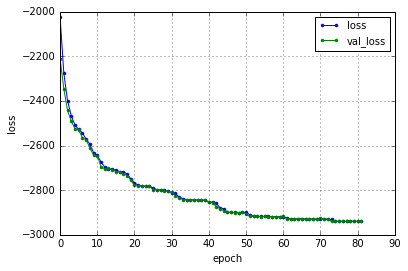

AccX is registed now
Build Complete
(254742,)
windowData's num =15890
SourceData's aborting data = 6
window shape is (15890, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=16-l1_reg=10e-5
Train on 15890 samples, validate on 15890 samples
Epoch 1/100
1s - loss: -4.8799e+03 - val_loss: -5.2553e+03
Epoch 2/100
1s - loss: -5.3738e+03 - val_loss: -5.4811e+03
Epoch 3/100
1s - loss: -5.5235e+03 - val_loss: -5.5877e+03
Epoch 4/100
1s - loss: -5.6266e+03 - val_loss: -5.6539e+03
Epoch 5/100
0s - loss: -5.6964e+03 - val_loss: -5.7100e+03
Epoch 6/100
1s - loss: -5.7475e+03 - val_loss: -5.7861e+03
Epoch 7/100
1s - loss: -5.7906e+03 - val_loss: -5.7993e+03
Epoch 8/100
1s - loss: -5.8177e+03 - val_loss: -5.8352e+03
Epoch 9/100
1s - loss: -5.8479e+03 - val_loss: -5.8563e+03
Epoch 10/100
1s - loss: -5.8642e+03 - val_loss: -5.8698e+03
Epoch 11/100
1s - loss: -5.8758e+03 - val_loss: -5.8811e+03
Epoch 12/100
1s - loss: -5.8847e+03 - val_loss: -5.8920e+03
Epoch 13/100
1s - loss: -5.9075e+03 - val_loss

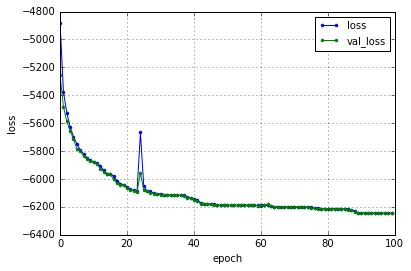

AccX is registed now
Build Complete
(254742,)
windowData's num =7945
SourceData's aborting data = 22
window shape is (7945, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=32-l1_reg=10e-5
Train on 7945 samples, validate on 7945 samples
Epoch 1/100
0s - loss: -4.6083e+03 - val_loss: -4.9604e+03
Epoch 2/100
0s - loss: -5.0672e+03 - val_loss: -5.1687e+03
Epoch 3/100
0s - loss: -5.2517e+03 - val_loss: -5.3364e+03
Epoch 4/100
0s - loss: -5.3746e+03 - val_loss: -5.3965e+03
Epoch 5/100
0s - loss: -5.4202e+03 - val_loss: -5.4332e+03
Epoch 6/100
0s - loss: -5.4437e+03 - val_loss: -5.4707e+03
Epoch 7/100
0s - loss: -5.4969e+03 - val_loss: -5.5225e+03
Epoch 8/100
0s - loss: -5.5425e+03 - val_loss: -5.5557e+03
Epoch 9/100
0s - loss: -5.5576e+03 - val_loss: -5.5732e+03
Epoch 10/100
0s - loss: -5.5729e+03 - val_loss: -5.5685e+03
Epoch 11/100
0s - loss: -5.5727e+03 - val_loss: -5.5789e+03
Epoch 12/100
0s - loss: -5.5794e+03 - val_loss: -5.5812e+03
Epoch 13/100
0s - loss: -5.5900e+03 - val_loss: -

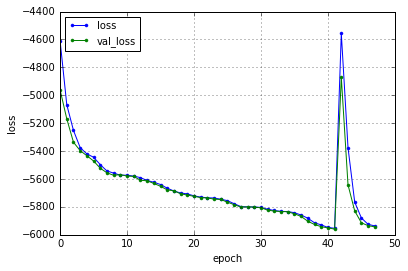

AccX is registed now
Build Complete
(254742,)
windowData's num =3973
SourceData's aborting data = 22
window shape is (3973, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=64-l1_reg=10e-5
Train on 3973 samples, validate on 3973 samples
Epoch 1/100
0s - loss: -4.5194e+03 - val_loss: -4.7860e+03
Epoch 2/100
0s - loss: -4.9014e+03 - val_loss: -5.0179e+03
Epoch 3/100
0s - loss: -5.1285e+03 - val_loss: -5.2128e+03
Epoch 4/100
0s - loss: -5.2681e+03 - val_loss: -5.3198e+03
Epoch 5/100
0s - loss: -5.3710e+03 - val_loss: -5.4094e+03
Epoch 6/100
0s - loss: -5.4345e+03 - val_loss: -5.4510e+03
Epoch 7/100
0s - loss: -5.4812e+03 - val_loss: -5.5029e+03
Epoch 8/100
0s - loss: -5.5125e+03 - val_loss: -5.5293e+03
Epoch 9/100
0s - loss: -5.5540e+03 - val_loss: -5.5713e+03
Epoch 10/100
0s - loss: -5.5975e+03 - val_loss: -5.6255e+03
Epoch 11/100
0s - loss: -5.6267e+03 - val_loss: -5.6315e+03
Epoch 12/100
0s - loss: -5.6580e+03 - val_loss: -5.6745e+03
Epoch 13/100
0s - loss: -5.6862e+03 - val_loss: -

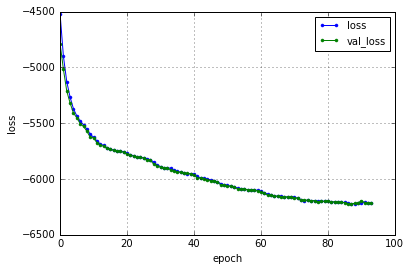

AccX is registed now
Build Complete
(254742,)
windowData's num =1987
SourceData's aborting data = 22
window shape is (1987, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=128-l1_reg=10e-5
Train on 1987 samples, validate on 1987 samples
Epoch 1/100
0s - loss: -4.1777e+03 - val_loss: -4.5947e+03
Epoch 2/100
0s - loss: -4.7029e+03 - val_loss: -4.7972e+03
Epoch 3/100
0s - loss: -4.8700e+03 - val_loss: -4.9579e+03
Epoch 4/100
0s - loss: -5.0196e+03 - val_loss: -5.0852e+03
Epoch 5/100
0s - loss: -5.1266e+03 - val_loss: -5.1780e+03
Epoch 6/100
0s - loss: -5.1982e+03 - val_loss: -5.2217e+03
Epoch 7/100
0s - loss: -5.2537e+03 - val_loss: -5.2642e+03
Epoch 8/100
0s - loss: -5.2823e+03 - val_loss: -5.2995e+03
Epoch 9/100
0s - loss: -5.3137e+03 - val_loss: -5.3292e+03
Epoch 10/100
0s - loss: -5.3413e+03 - val_loss: -5.3541e+03
Epoch 11/100
0s - loss: -5.3631e+03 - val_loss: -5.3601e+03
Epoch 12/100
0s - loss: -5.3752e+03 - val_loss: -5.3858e+03
Epoch 13/100
0s - loss: -5.3964e+03 - val_loss: 

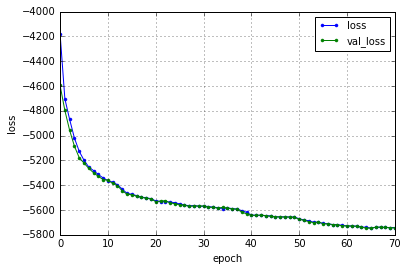

AccX is registed now
Build Complete
(254742,)
windowData's num =994
SourceData's aborting data = 22
window shape is (994, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=256-l1_reg=10e-5
Train on 994 samples, validate on 994 samples
Epoch 1/100
0s - loss: -4.0253e+03 - val_loss: -4.2586e+03
Epoch 2/100
0s - loss: -4.4812e+03 - val_loss: -4.6700e+03
Epoch 3/100
0s - loss: -4.7384e+03 - val_loss: -4.8009e+03
Epoch 4/100
0s - loss: -4.8458e+03 - val_loss: -4.8733e+03
Epoch 5/100
0s - loss: -4.8906e+03 - val_loss: -4.9226e+03
Epoch 6/100
0s - loss: -4.9342e+03 - val_loss: -4.9507e+03
Epoch 7/100
0s - loss: -4.9764e+03 - val_loss: -5.0296e+03
Epoch 8/100
0s - loss: -5.0576e+03 - val_loss: -5.0858e+03
Epoch 9/100
0s - loss: -5.0926e+03 - val_loss: -5.0997e+03
Epoch 10/100
0s - loss: -5.1110e+03 - val_loss: -5.1325e+03
Epoch 11/100
0s - loss: -5.1521e+03 - val_loss: -5.1869e+03
Epoch 12/100
0s - loss: -5.1993e+03 - val_loss: -5.2075e+03
Epoch 13/100
0s - loss: -5.2216e+03 - val_loss: -5.2

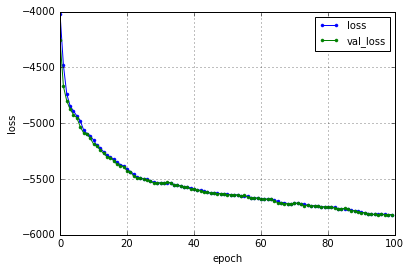

AccX is registed now
Build Complete
(254742,)
windowData's num =15858
SourceData's aborting data = 6
window shape is (15858, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=16-l1_reg=10e-5
Train on 15858 samples, validate on 15858 samples
Epoch 1/100
1s - loss: -9.4613e+03 - val_loss: -1.0084e+04
Epoch 2/100
1s - loss: -1.0428e+04 - val_loss: -1.0618e+04
Epoch 3/100
1s - loss: -1.0733e+04 - val_loss: -1.0847e+04
Epoch 4/100
1s - loss: -1.0942e+04 - val_loss: -1.1031e+04
Epoch 5/100
1s - loss: -1.1084e+04 - val_loss: -1.1122e+04
Epoch 6/100
1s - loss: -1.1146e+04 - val_loss: -1.1176e+04
Epoch 7/100
1s - loss: -1.1186e+04 - val_loss: -1.1222e+04
Epoch 8/100
1s - loss: -1.1266e+04 - val_loss: -1.1308e+04
Epoch 9/100
1s - loss: -1.1331e+04 - val_loss: -1.1352e+04
Epoch 10/100
1s - loss: -1.1384e+04 - val_loss: -1.1416e+04
Epoch 11/100
1s - loss: -1.1406e+04 - val_loss: -1.1406e+04
Epoch 12/100
1s - loss: -1.1428e+04 - val_loss: -1.1442e+04
Epoch 13/100
1s - loss: -1.1457e+04 - val_lo

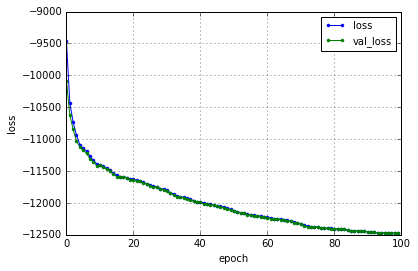

AccX is registed now
Build Complete
(254742,)
windowData's num =7929
SourceData's aborting data = 22
window shape is (7929, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=32-l1_reg=10e-5
Train on 7929 samples, validate on 7929 samples
Epoch 1/100
0s - loss: -9.0456e+03 - val_loss: -9.5459e+03
Epoch 2/100
0s - loss: -9.7572e+03 - val_loss: -9.9158e+03
Epoch 3/100
0s - loss: -1.0044e+04 - val_loss: -1.0161e+04
Epoch 4/100
0s - loss: -1.0266e+04 - val_loss: -1.0336e+04
Epoch 5/100
0s - loss: -1.0406e+04 - val_loss: -1.0464e+04
Epoch 6/100
0s - loss: -1.0501e+04 - val_loss: -1.0546e+04
Epoch 7/100
0s - loss: -1.0580e+04 - val_loss: -1.0612e+04
Epoch 8/100
0s - loss: -1.0622e+04 - val_loss: -1.0633e+04
Epoch 9/100
0s - loss: -1.0657e+04 - val_loss: -1.0675e+04
Epoch 10/100
0s - loss: -1.0701e+04 - val_loss: -1.0724e+04
Epoch 11/100
0s - loss: -1.0748e+04 - val_loss: -1.0758e+04
Epoch 12/100
0s - loss: -1.0769e+04 - val_loss: -1.0774e+04
Epoch 13/100
0s - loss: -1.0781e+04 - val_loss:

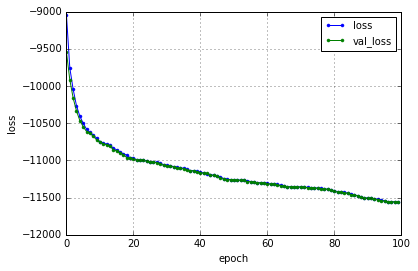

AccX is registed now
Build Complete
(254742,)
windowData's num =3965
SourceData's aborting data = 22
window shape is (3965, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=64-l1_reg=10e-5
Train on 3965 samples, validate on 3965 samples
Epoch 1/100
0s - loss: -8.9675e+03 - val_loss: -9.5022e+03
Epoch 2/100
0s - loss: -9.6987e+03 - val_loss: -9.8759e+03
Epoch 3/100
0s - loss: -1.0027e+04 - val_loss: -1.0151e+04
Epoch 4/100
0s - loss: -1.0242e+04 - val_loss: -1.0346e+04
Epoch 5/100
0s - loss: -1.0411e+04 - val_loss: -1.0476e+04
Epoch 6/100
0s - loss: -1.0571e+04 - val_loss: -1.0643e+04
Epoch 7/100
0s - loss: -1.0682e+04 - val_loss: -1.0733e+04
Epoch 8/100
0s - loss: -1.0759e+04 - val_loss: -1.0791e+04
Epoch 9/100
0s - loss: -1.0827e+04 - val_loss: -1.0880e+04
Epoch 10/100
0s - loss: -1.0901e+04 - val_loss: -1.0932e+04
Epoch 11/100
0s - loss: -1.0948e+04 - val_loss: -1.0954e+04
Epoch 12/100
0s - loss: -1.0961e+04 - val_loss: -1.0984e+04
Epoch 13/100
0s - loss: -1.1008e+04 - val_loss:

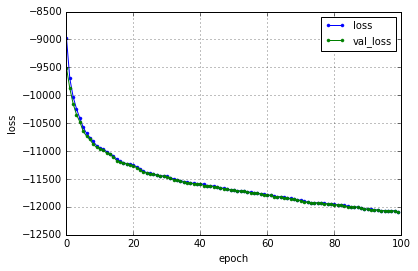

AccX is registed now
Build Complete
(254742,)
windowData's num =1983
SourceData's aborting data = 22
window shape is (1983, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=128-l1_reg=10e-5
Train on 1983 samples, validate on 1983 samples
Epoch 1/100
0s - loss: -8.5041e+03 - val_loss: -9.1873e+03
Epoch 2/100
0s - loss: -9.4122e+03 - val_loss: -9.5843e+03
Epoch 3/100
0s - loss: -9.7145e+03 - val_loss: -9.8734e+03
Epoch 4/100
0s - loss: -9.9571e+03 - val_loss: -1.0051e+04
Epoch 5/100
0s - loss: -1.0098e+04 - val_loss: -1.0158e+04
Epoch 6/100
0s - loss: -1.0210e+04 - val_loss: -1.0263e+04
Epoch 7/100
0s - loss: -1.0308e+04 - val_loss: -1.0355e+04
Epoch 8/100
0s - loss: -1.0373e+04 - val_loss: -1.0409e+04
Epoch 9/100
0s - loss: -1.0461e+04 - val_loss: -1.0521e+04
Epoch 10/100
0s - loss: -1.0545e+04 - val_loss: -1.0588e+04
Epoch 11/100
0s - loss: -1.0617e+04 - val_loss: -1.0647e+04
Epoch 12/100
0s - loss: -1.0672e+04 - val_loss: -1.0690e+04
Epoch 13/100
0s - loss: -1.0710e+04 - val_loss

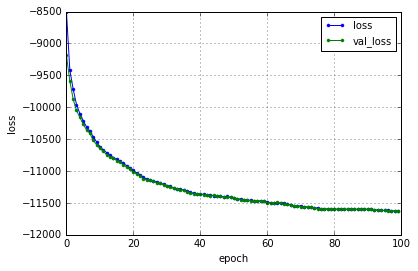

AccX is registed now
Build Complete
(254742,)
windowData's num =992
SourceData's aborting data = 22
window shape is (992, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=256-l1_reg=10e-5
Train on 992 samples, validate on 992 samples
Epoch 1/100
0s - loss: -8.0466e+03 - val_loss: -8.4522e+03
Epoch 2/100
0s - loss: -8.6864e+03 - val_loss: -8.9618e+03
Epoch 3/100
0s - loss: -9.0459e+03 - val_loss: -9.1300e+03
Epoch 4/100
0s - loss: -9.1918e+03 - val_loss: -9.2670e+03
Epoch 5/100
0s - loss: -9.3191e+03 - val_loss: -9.3909e+03
Epoch 6/100
0s - loss: -9.4281e+03 - val_loss: -9.4890e+03
Epoch 7/100
0s - loss: -9.5146e+03 - val_loss: -9.5531e+03
Epoch 8/100
0s - loss: -9.5762e+03 - val_loss: -9.6351e+03
Epoch 9/100
0s - loss: -9.6695e+03 - val_loss: -9.7101e+03
Epoch 10/100
0s - loss: -9.7507e+03 - val_loss: -9.8267e+03
Epoch 11/100
0s - loss: -9.8586e+03 - val_loss: -9.9013e+03
Epoch 12/100
0s - loss: -9.9483e+03 - val_loss: -9.9789e+03
Epoch 13/100
0s - loss: -1.0036e+04 - val_loss: -1

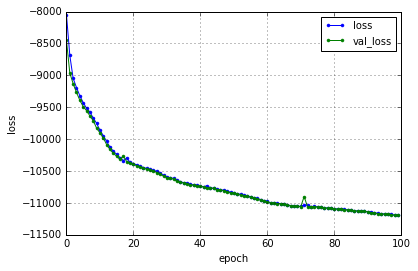

AccX is registed now
Build Complete
(254742,)
windowData's num =15794
SourceData's aborting data = 6
window shape is (15794, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=16-l1_reg=10e-5
Train on 15794 samples, validate on 15794 samples
Epoch 1/100
3s - loss: -1.8804e+04 - val_loss: -1.9720e+04
Epoch 2/100
3s - loss: -2.0095e+04 - val_loss: -2.0414e+04
Epoch 3/100
4s - loss: -2.0624e+04 - val_loss: -2.0793e+04
Epoch 4/100
3s - loss: -2.0878e+04 - val_loss: -2.0962e+04
Epoch 5/100
2s - loss: -2.1027e+04 - val_loss: -2.1085e+04
Epoch 6/100
2s - loss: -2.1127e+04 - val_loss: -2.1182e+04
Epoch 7/100
3s - loss: -2.1232e+04 - val_loss: -2.1298e+04
Epoch 8/100
2s - loss: -2.1331e+04 - val_loss: -2.1368e+04
Epoch 9/100
3s - loss: -2.1404e+04 - val_loss: -2.1436e+04
Epoch 10/100
2s - loss: -2.1482e+04 - val_loss: -2.1532e+04
Epoch 11/100
3s - loss: -2.1550e+04 - val_loss: -2.1580e+04
Epoch 12/100
3s - loss: -2.1605e+04 - val_loss: -2.1618e+04
Epoch 13/100
3s - loss: -2.1642e+04 - val_lo

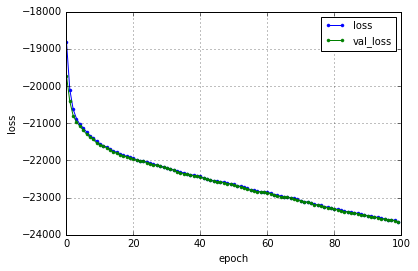

AccX is registed now
Build Complete
(254742,)
windowData's num =7897
SourceData's aborting data = 22
window shape is (7897, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=32-l1_reg=10e-5
Train on 7897 samples, validate on 7897 samples
Epoch 1/100
1s - loss: -1.8555e+04 - val_loss: -1.9592e+04
Epoch 2/100
1s - loss: -2.0002e+04 - val_loss: -2.0363e+04
Epoch 3/100
1s - loss: -2.0561e+04 - val_loss: -2.0754e+04
Epoch 4/100
1s - loss: -2.0879e+04 - val_loss: -2.1018e+04
Epoch 5/100
1s - loss: -2.1150e+04 - val_loss: -2.1246e+04
Epoch 6/100
1s - loss: -2.1343e+04 - val_loss: -2.1445e+04
Epoch 7/100
1s - loss: -2.1514e+04 - val_loss: -2.1559e+04
Epoch 8/100
1s - loss: -2.1600e+04 - val_loss: -2.1646e+04
Epoch 9/100
1s - loss: -2.1691e+04 - val_loss: -2.1763e+04
Epoch 10/100
1s - loss: -2.1817e+04 - val_loss: -2.1875e+04
Epoch 11/100
1s - loss: -2.1898e+04 - val_loss: -2.1942e+04
Epoch 12/100
1s - loss: -2.1973e+04 - val_loss: -2.2004e+04
Epoch 13/100
1s - loss: -2.2039e+04 - val_loss:

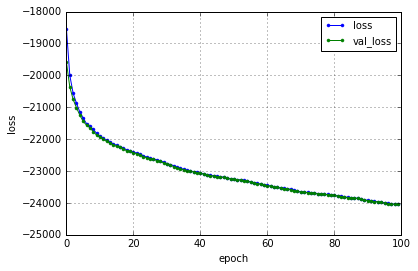

AccX is registed now
Build Complete
(254742,)
windowData's num =3949
SourceData's aborting data = 22
window shape is (3949, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=64-l1_reg=10e-5
Train on 3949 samples, validate on 3949 samples
Epoch 1/100
0s - loss: -1.7629e+04 - val_loss: -1.8751e+04
Epoch 2/100
0s - loss: -1.8959e+04 - val_loss: -1.9162e+04
Epoch 3/100
0s - loss: -1.9280e+04 - val_loss: -1.9430e+04
Epoch 4/100
0s - loss: -1.9571e+04 - val_loss: -1.9720e+04
Epoch 5/100
0s - loss: -1.9683e+04 - val_loss: -1.9843e+04
Epoch 6/100
0s - loss: -1.9938e+04 - val_loss: -2.0063e+04
Epoch 7/100
0s - loss: -2.0107e+04 - val_loss: -2.0210e+04
Epoch 8/100
0s - loss: -2.0275e+04 - val_loss: -2.0313e+04
Epoch 9/100
0s - loss: -2.0385e+04 - val_loss: -2.0430e+04
Epoch 10/100
0s - loss: -2.0462e+04 - val_loss: -2.0483e+04
Epoch 11/100
0s - loss: -2.0516e+04 - val_loss: -2.0552e+04
Epoch 12/100
0s - loss: -2.0572e+04 - val_loss: -2.0624e+04
Epoch 13/100
0s - loss: -2.0635e+04 - val_loss:

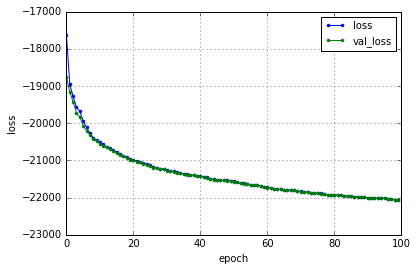

AccX is registed now
Build Complete
(254742,)
windowData's num =1975
SourceData's aborting data = 22
window shape is (1975, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=128-l1_reg=10e-5
Train on 1975 samples, validate on 1975 samples
Epoch 1/100
0s - loss: -1.7312e+04 - val_loss: -1.8484e+04
Epoch 2/100
0s - loss: -1.8770e+04 - val_loss: -1.9017e+04
Epoch 3/100
0s - loss: -1.9101e+04 - val_loss: -1.9230e+04
Epoch 4/100
0s - loss: -1.9333e+04 - val_loss: -1.9435e+04
Epoch 5/100
0s - loss: -1.9513e+04 - val_loss: -1.9625e+04
Epoch 6/100
0s - loss: -1.9694e+04 - val_loss: -1.9791e+04
Epoch 7/100
0s - loss: -1.9862e+04 - val_loss: -1.9976e+04
Epoch 8/100
0s - loss: -2.0037e+04 - val_loss: -2.0107e+04
Epoch 9/100
0s - loss: -2.0161e+04 - val_loss: -2.0241e+04
Epoch 10/100
0s - loss: -2.0290e+04 - val_loss: -2.0363e+04
Epoch 11/100
0s - loss: -2.0416e+04 - val_loss: -2.0480e+04
Epoch 12/100
0s - loss: -2.0532e+04 - val_loss: -2.0585e+04
Epoch 13/100
0s - loss: -2.0630e+04 - val_loss

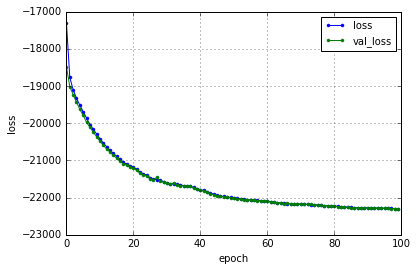

AccX is registed now
Build Complete
(254742,)
windowData's num =988
SourceData's aborting data = 22
window shape is (988, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=256-l1_reg=10e-5
Train on 988 samples, validate on 988 samples
Epoch 1/100
0s - loss: -1.6748e+04 - val_loss: -1.7510e+04
Epoch 2/100
0s - loss: -1.7972e+04 - val_loss: -1.8584e+04
Epoch 3/100
0s - loss: -1.8759e+04 - val_loss: -1.9053e+04
Epoch 4/100
0s - loss: -1.9132e+04 - val_loss: -1.9247e+04
Epoch 5/100
0s - loss: -1.9294e+04 - val_loss: -1.9377e+04
Epoch 6/100
0s - loss: -1.9437e+04 - val_loss: -1.9508e+04
Epoch 7/100
0s - loss: -1.9543e+04 - val_loss: -1.9591e+04
Epoch 8/100
0s - loss: -1.9620e+04 - val_loss: -1.9671e+04
Epoch 9/100
0s - loss: -1.9707e+04 - val_loss: -1.9758e+04
Epoch 10/100
0s - loss: -1.9776e+04 - val_loss: -1.9817e+04
Epoch 11/100
0s - loss: -1.9839e+04 - val_loss: -1.9882e+04
Epoch 12/100
0s - loss: -1.9908e+04 - val_loss: -1.9962e+04
Epoch 13/100
0s - loss: -1.9994e+04 - val_loss: -2

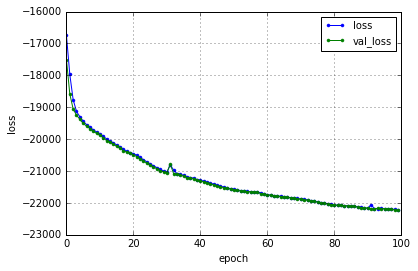

AccX is registed now
Build Complete
(254742,)
windowData's num =15666
SourceData's aborting data = 6
window shape is (15666, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=16-l1_reg=10e-5
Train on 15666 samples, validate on 15666 samples
Epoch 1/100
8s - loss: -3.7774e+04 - val_loss: -3.9577e+04
Epoch 2/100
7s - loss: -4.0056e+04 - val_loss: -4.0476e+04
Epoch 3/100
7s - loss: -4.0827e+04 - val_loss: -4.1152e+04
Epoch 4/100
7s - loss: -4.1335e+04 - val_loss: -4.1497e+04
Epoch 5/100
7s - loss: -4.1647e+04 - val_loss: -4.1777e+04
Epoch 6/100
7s - loss: -4.1869e+04 - val_loss: -4.1983e+04
Epoch 7/100
6s - loss: -4.2045e+04 - val_loss: -4.2127e+04
Epoch 8/100
6s - loss: -4.2196e+04 - val_loss: -4.2282e+04
Epoch 9/100
6s - loss: -4.2325e+04 - val_loss: -4.2362e+04
Epoch 10/100
6s - loss: -4.2403e+04 - val_loss: -4.2466e+04
Epoch 11/100
6s - loss: -4.2510e+04 - val_loss: -4.2568e+04
Epoch 12/100
6s - loss: -4.2609e+04 - val_loss: -4.2657e+04
Epoch 13/100
6s - loss: -4.2698e+04 - val_lo

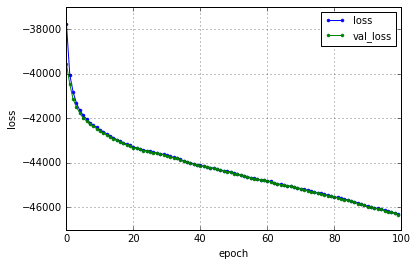

AccX is registed now
Build Complete
(254742,)
windowData's num =7833
SourceData's aborting data = 22
window shape is (7833, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=32-l1_reg=10e-5
Train on 7833 samples, validate on 7833 samples
Epoch 1/100
2s - loss: -3.6331e+04 - val_loss: -3.8106e+04
Epoch 2/100
2s - loss: -3.8694e+04 - val_loss: -3.9232e+04
Epoch 3/100
2s - loss: -3.9467e+04 - val_loss: -3.9747e+04
Epoch 4/100
2s - loss: -3.9940e+04 - val_loss: -4.0083e+04
Epoch 5/100
2s - loss: -4.0225e+04 - val_loss: -4.0363e+04
Epoch 6/100
2s - loss: -4.0478e+04 - val_loss: -4.0595e+04
Epoch 7/100
2s - loss: -4.0728e+04 - val_loss: -4.0840e+04
Epoch 8/100
2s - loss: -4.0926e+04 - val_loss: -4.1015e+04
Epoch 9/100
2s - loss: -4.1075e+04 - val_loss: -4.1171e+04
Epoch 10/100
2s - loss: -4.1248e+04 - val_loss: -4.1328e+04
Epoch 11/100
2s - loss: -4.1368e+04 - val_loss: -4.1414e+04
Epoch 12/100
2s - loss: -4.1452e+04 - val_loss: -4.1488e+04
Epoch 13/100
2s - loss: -4.1546e+04 - val_loss:

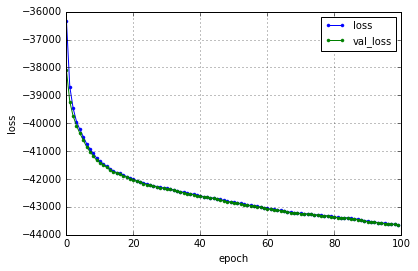

AccX is registed now
Build Complete
(254742,)
windowData's num =3917
SourceData's aborting data = 22
window shape is (3917, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=64-l1_reg=10e-5
Train on 3917 samples, validate on 3917 samples
Epoch 1/100
1s - loss: -3.4403e+04 - val_loss: -3.6316e+04
Epoch 2/100
1s - loss: -3.6889e+04 - val_loss: -3.7506e+04
Epoch 3/100
0s - loss: -3.7818e+04 - val_loss: -3.8163e+04
Epoch 4/100
0s - loss: -3.8371e+04 - val_loss: -3.8644e+04
Epoch 5/100
0s - loss: -3.8804e+04 - val_loss: -3.8960e+04
Epoch 6/100
0s - loss: -3.9085e+04 - val_loss: -3.9222e+04
Epoch 7/100
0s - loss: -3.9321e+04 - val_loss: -3.9433e+04
Epoch 8/100
0s - loss: -3.9486e+04 - val_loss: -3.9617e+04
Epoch 9/100
0s - loss: -3.9682e+04 - val_loss: -3.9818e+04
Epoch 10/100
0s - loss: -3.9849e+04 - val_loss: -3.9873e+04
Epoch 11/100
0s - loss: -3.9945e+04 - val_loss: -3.9993e+04
Epoch 12/100
0s - loss: -4.0060e+04 - val_loss: -4.0127e+04
Epoch 13/100
0s - loss: -4.0189e+04 - val_loss:

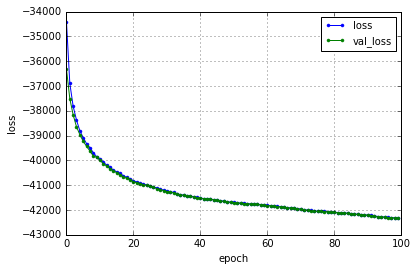

AccX is registed now
Build Complete
(254742,)
windowData's num =1959
SourceData's aborting data = 22
window shape is (1959, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=128-l1_reg=10e-5
Train on 1959 samples, validate on 1959 samples
Epoch 1/100
0s - loss: -3.4122e+04 - val_loss: -3.5375e+04
Epoch 2/100
0s - loss: -3.6192e+04 - val_loss: -3.7281e+04
Epoch 3/100
0s - loss: -3.7640e+04 - val_loss: -3.8167e+04
Epoch 4/100
0s - loss: -3.8374e+04 - val_loss: -3.8678e+04
Epoch 5/100
0s - loss: -3.8816e+04 - val_loss: -3.9006e+04
Epoch 6/100
0s - loss: -3.9108e+04 - val_loss: -3.9270e+04
Epoch 7/100
0s - loss: -3.9338e+04 - val_loss: -3.9494e+04
Epoch 8/100
0s - loss: -3.9570e+04 - val_loss: -3.9714e+04
Epoch 9/100
0s - loss: -3.9810e+04 - val_loss: -3.9953e+04
Epoch 10/100
0s - loss: -3.9990e+04 - val_loss: -4.0072e+04
Epoch 11/100
0s - loss: -4.0152e+04 - val_loss: -4.0267e+04
Epoch 12/100
0s - loss: -4.0309e+04 - val_loss: -4.0389e+04
Epoch 13/100
0s - loss: -4.0447e+04 - val_loss

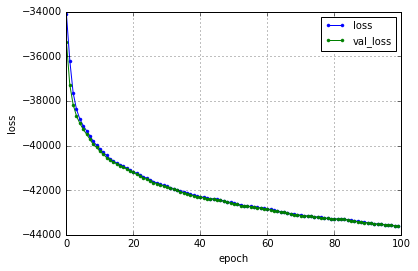

AccX is registed now
Build Complete
(254742,)
windowData's num =980
SourceData's aborting data = 22
window shape is (980, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=256-l1_reg=10e-5
Train on 980 samples, validate on 980 samples
Epoch 1/100
0s - loss: -3.2538e+04 - val_loss: -3.4345e+04
Epoch 2/100
0s - loss: -3.4654e+04 - val_loss: -3.5469e+04
Epoch 3/100
0s - loss: -3.5679e+04 - val_loss: -3.6187e+04
Epoch 4/100
0s - loss: -3.6284e+04 - val_loss: -3.6596e+04
Epoch 5/100
0s - loss: -3.6706e+04 - val_loss: -3.6929e+04
Epoch 6/100
0s - loss: -3.7011e+04 - val_loss: -3.7196e+04
Epoch 7/100
0s - loss: -3.7284e+04 - val_loss: -3.7482e+04
Epoch 8/100
0s - loss: -3.7555e+04 - val_loss: -3.7700e+04
Epoch 9/100
0s - loss: -3.7769e+04 - val_loss: -3.7938e+04
Epoch 10/100
0s - loss: -3.7993e+04 - val_loss: -3.8096e+04
Epoch 11/100
0s - loss: -3.8114e+04 - val_loss: -3.8230e+04
Epoch 12/100
0s - loss: -3.8253e+04 - val_loss: -3.8341e+04
Epoch 13/100
0s - loss: -3.8378e+04 - val_loss: -3

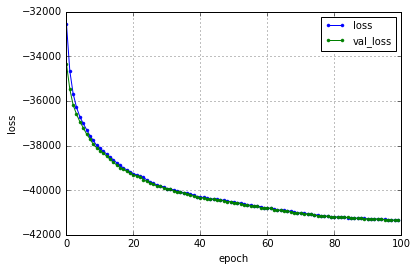

In [8]:
# loop windowWidth
for SampleNum in WindowWidth:
    for Overlap in OverlapArray:

        w=window.Window()
        w.SetData(Axis,dic[Axis])
        wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
        windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
        print "hiden node = "+str(encoding_dim)
        CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+"l1_reg=10e-5"
        print CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh',
                    W_regularizer=regularizers.WeightRegularizer(l1=10e-5,l2=0.0))(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
        
        #autoencoder.compile(optimizer='adam', loss='mse')
        autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')
        
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=100,
                        verbose=2,
                        batch_size=shapeNum/8,
                        shuffle=True,
                        validation_data=(window_test, window_test)
                        ,callbacks=[early_stopping]
                              )
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()

In [9]:
print "finish"

finish
